In [2]:
import os, time, random
import numpy as np
import pandas as pd
import cv2
import torch
import shutil

import matplotlib.pyplot as plt

from ultralytics import YOLO


import warnings
warnings.filterwarnings("ignore")

In [2]:
torch.cuda.is_available()

True

In [3]:
torch.cuda.get_device_name (0)

'NVIDIA GeForce RTX 3050 Laptop GPU'

In [15]:
dataset_path = "dataset\\export"

# Reading an image

In [19]:
imges_path = os.path.join(dataset_path, "images")

In [20]:
image = cv2.imread(os.path.join(imges_path, os.listdir(imges_path)[random.randint(1, 20000)]))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

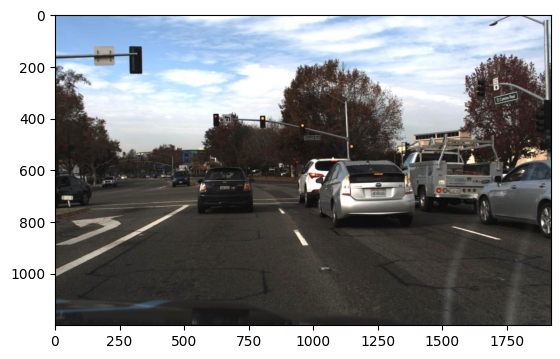

In [21]:
plt.imshow(image)

# Splitting the data set into train, validate and test
- train 70%
- validation 15%
- test 15%

In [3]:
train_path = "dataset\\train"
test_path = "dataset\\test"
valid_path = "dataset\\valid"

In [55]:
files = os.listdir(os.path.join(dataset_path, "labels"))

In [56]:
len(files)

30000

In [57]:
print(f"Train size is {0.7 * 30_000}")
print(f"Test size is {0.15 * 30_000}")
print(f"valid size is {0.15 * 30_000}")

Train size is 21000.0
Test size is 4500.0
valid size is 4500.0


In [58]:
# Shuffling the data before splitting
random.shuffle(files)

In [62]:
# Moving the train dataset to the train directory

def split_data(no_of_images, dest_path):
    for i in range(no_of_images):
        # sample = os.path.splitext(files[i])[0] # test
        # sample = os.path.splitext(files[i + 21_000])[0] # valid
        sample = os.path.splitext(files[i + 21_000 + 4_500])[0]
        source_image_path = os.path.join(os.path.join(dataset_path, "images"), sample) + ".jpg"
        source_label_path = os.path.join(os.path.join(dataset_path, "labels"), sample) + ".txt"
        dest_image_path = os.path.join(os.path.join(dest_path, "images"), sample) + ".jpg"
        dest_label_path = os.path.join(os.path.join(dest_path, "labels"), sample) + ".txt"
        shutil.move(source_image_path, dest_image_path)
        shutil.move(source_label_path, dest_label_path)    

In [64]:
# train
split_data(21_500, train_path)

In [61]:
# valid
split_data(4_500, valid_path)

In [63]:
# test
split_data(4_500, test_path)

In [66]:
# deleting the old dataset directory
shutil.rmtree(dataset_path)
del dataset_path

# Training the model

In [67]:
model = YOLO('yolov8n.pt')

100%|█████████████████████████████████████████████████████████████████████████████| 6.23M/6.23M [00:02<00:00, 2.75MB/s]


In [70]:
model.train(data="dataset\\data.yaml", epochs=100, optimizer='Adam', batch=16, lr0=1e-3, val=True)

New https://pypi.org/project/ultralytics/8.0.82 available  Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.75  Python-3.9.16 torch-2.0.0 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)
yolo\engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=dataset\data.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=Adam, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      5/100      2.37G      1.446     0.8967      1.087        181        640: 100%|██████████| 1313/1313 [13:21<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 141/141 [01:
                   all       4500      29293      0.692      0.444      0.493      0.255

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      6/100      2.39G      1.431     0.8741      1.079         67        640: 100%|██████████| 1313/1313 [10:04<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 141/141 [01:
                   all       4500      29293      0.687      0.466      0.526      0.281

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      7/100       2.4G      1.419     0.8589      1.078        111        640: 100%|██████████| 1313/1313

# Resuming the training from the last check point

In [2]:
model = YOLO("runs\\detect\\train2\\weights\\last.pt")

In [3]:
model.train(data="dataset\\data.yaml", epochs=100, optimizer='Adam', batch=16, lr0=1e-3, val=True, resume=True)

New https://pypi.org/project/ultralytics/8.0.83 available  Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.75  Python-3.9.16 torch-2.0.0 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)
yolo\engine\trainer: task=detect, mode=train, model=runs\detect\train2\weights\last.pt, data=dataset\data.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=Adam, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic

# Testing the model

In [5]:
# Loading the model
model = YOLO("runs//detect//train2//weights//best.pt")

In [6]:
# for img in os.listdir(test_path + "\\images"):
model.predict(
   source= os.path.join(test_path + "\\images", os.listdir(test_path + "\\images")[random.randint(1, 4500)]),
   conf=0.25,
   save=True
)


image 1/1 D:\5.SelfDrivingCars\dataset\test\images\1478732278515840131_jpg.rf.8M1U9XMbWQxxO59XE4wa.jpg: 416x640 8 cars, 1 truck, 62.5ms
Speed: 0.0ms preprocess, 62.5ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict2


[ultralytics.yolo.engine.results.Results object with attributes:
 
 boxes: ultralytics.yolo.engine.results.Boxes object
 keypoints: None
 keys: ['boxes']
 masks: None
 names: {0: 'biker', 1: 'car', 2: 'pedestrian', 3: 'trafficLight', 4: 'trafficLight-Green', 5: 'trafficLight-GreenLeft', 6: 'trafficLight-Red', 7: 'trafficLight-RedLeft', 8: 'trafficLight-Yellow', 9: 'trafficLight-YellowLeft', 10: 'truck'}
 orig_img: array([[[174, 181, 168],
         [162, 168, 157],
         [146, 151, 142],
         ...,
         [ 47,  73,  80],
         [ 56,  86,  97],
         [ 54,  86,  97]],
 
        [[163, 170, 157],
         [154, 160, 149],
         [142, 147, 138],
         ...,
         [ 53,  79,  86],
         [ 62,  93, 102],
         [ 61,  93, 104]],
 
        [[148, 154, 143],
         [146, 152, 141],
         [140, 145, 136],
         ...,
         [ 62,  88,  95],
         [ 73, 104, 113],
         [ 72, 105, 114]],
 
        ...,
 
        [[ 15,  17,  18],
         [ 15,  17,  18